In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [173]:
df=pd.read_csv('h1n1_vaccine_prediction.csv')

In [174]:
df.head(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [175]:
df.shape

(26707, 34)

In [176]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [178]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

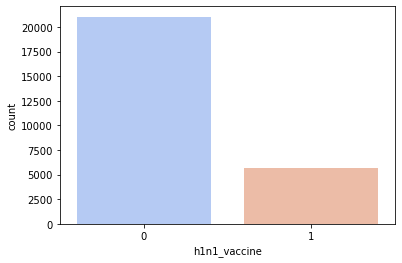

In [179]:
sns.countplot(x="h1n1_vaccine",data=df,palette="coolwarm")

In [180]:
df["h1n1_vaccine"].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

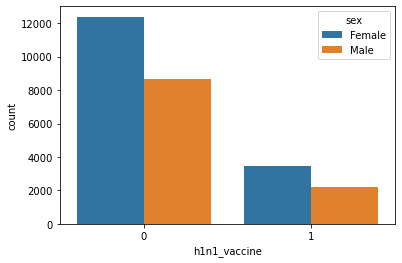

In [181]:
sns.countplot(x="h1n1_vaccine",hue="sex",data=df)

In [182]:
pd.crosstab(df["h1n1_vaccine"],df["sex"])

sex,Female,Male
h1n1_vaccine,,
0,12378,8655
1,3480,2194


<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

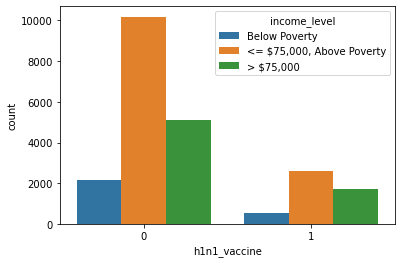

In [183]:
sns.countplot(x="h1n1_vaccine",hue="income_level",data=df)

In [184]:
pd.crosstab(df["h1n1_vaccine"],df["income_level"])

income_level,"<= $75,000, Above Poverty","> $75,000",Below Poverty
h1n1_vaccine,,,
0,10178,5087,2181
1,2599,1723,516


<AxesSubplot:xlabel='h1n1_vaccine', ylabel='income_level'>

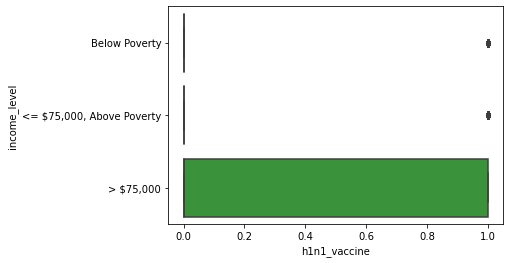

In [185]:
sns.boxplot(x="h1n1_vaccine",y="income_level",data=df)

In [186]:
df=df.drop("has_health_insur",axis=1)

In [187]:
df=df.drop("age_bracket",axis=1)

In [188]:
df=df.drop(["census_msa","income_level","qualification"],axis=1)

In [189]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,is_seas_risky,sick_from_seas_vacc,race,sex,marital_status,housing_status,employment,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,2.0,White,Female,Not Married,Own,Not in Labor Force,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2.0,4.0,White,Male,Not Married,Rent,Employed,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,White,Male,Not Married,Own,Employed,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,4.0,1.0,White,Female,Not Married,Rent,Not in Labor Force,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,4.0,White,Female,Married,Own,Employed,1.0,0.0,0


In [190]:
df=df.dropna()

In [191]:
df.shape

(21793, 29)

In [192]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,is_seas_risky,sick_from_seas_vacc,race,sex,marital_status,housing_status,employment,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,2.0,White,Female,Not Married,Own,Not in Labor Force,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2.0,4.0,White,Male,Not Married,Rent,Employed,0.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,4.0,1.0,White,Female,Not Married,Rent,Not in Labor Force,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,4.0,White,Female,Married,Own,Employed,1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,4.0,4.0,White,Male,Married,Own,Employed,2.0,3.0,0


In [193]:
df=pd.get_dummies(columns=["marital_status","housing_status","employment","race","sex"],data=df)

In [194]:
df.head(20)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,housing_status_Rent,employment_Employed,employment_Not in Labor Force,employment_Unemployed,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,1,1,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,1,0,0,0,0,0,1,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,0,1,0,0,0,0,1,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,1,0,0,0,0,0,1,1,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,1,0,1
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,1
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,1,1,0
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,1,0,0,0,0,0,1,0,1
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,0,1,0,0,0,0,1,0,1
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,1,0,0,0,0,0,1,0,1


In [195]:
X=df.drop("h1n1_vaccine",axis=1)
y=df["h1n1_vaccine"]

In [208]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [197]:
model=LogisticRegression()

In [198]:
model.fit(X_train,y_train)

LogisticRegression()

In [199]:
model.score(X_train,y_train)

0.8203212061619142

In [200]:
model.score(X_test,y_test)

0.816916488222698

In [201]:
predictions=model.predict(X_test)

In [202]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [203]:
accuracy_score(y_test,predictions)

0.816916488222698

<AxesSubplot:>

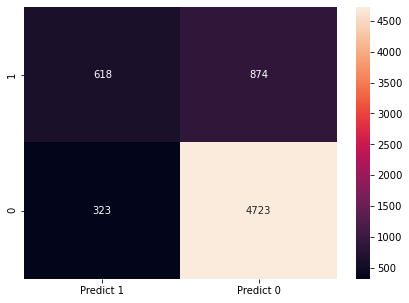

In [204]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [205]:
from sklearn.tree import DecisionTreeClassifier

In [217]:
model_1=DecisionTreeClassifier(max_depth=4)

In [218]:
model_1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [219]:
model_1.score(X_train,y_train)

0.8278597181252049

In [220]:
model_1.score(X_test,y_test)

0.8135515448149281